### 데이터 간단 EDA 

노션이 제시하는 방향 : OTT별 고객층 인구 통계학적 특성 선호 장르 평점 경향성등 특징 비교   

https://www.kaggle.com/code/jackieyi/netfilx-data-cleaning-and-eda/notebook

https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies/code?datasetId=2178661&searchQuery=machine

https://www.kaggle.com/code/muhammadanas0716/netflix-tv-shows-and-movies-eda/notebook

https://www.kaggle.com/code/danielpry/netflix-recommendation-system


https://www.kaggle.com/code/rushikeshdane20/plotly-tutorial-how-to-make-plotly-visuals-better

https://www.kaggle.com/code/danielpry/netflix-recommendation-system

https://www.kaggle.com/code/carora/human-ai-workshop-recommendation

https://www.kaggle.com/code/danielproctorparr/netflix-analysis



https://www.kaggle.com/code/henriquedossantos02/prova-b02-henrique-e-derick

https://www.kaggle.com/code/vitorgamalemos/disney-tv-eda-cosine-similirity


https://www.kaggle.com/code/nahidahsan/amazon-data-visualization-and-recomendation/notebook

https://www.kaggle.com/code/nguyenthicamlai/eda-on-netflix-movies-and-tv-shows

https://www.kaggle.com/code/thomaslazarus/streaming-service-data-analysis





In [186]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [187]:
# read csv 

netflix_df =pd.read_csv("./Netflex_data/titles.csv")
amazon_df =pd.read_csv("./Amazon_Prime_data/titles.csv")
disney_df=pd.read_csv("./Disney_TV_data/titles.csv")
paramount_df=pd.read_csv("./Paramount_data/titles.csv")



In [188]:
# plattfrom service 정해주기 
amazon_df = (amazon_df.assign(Platform="amazon"))
disney_df = (disney_df.assign(Platform="disney"))
paramount_df = (paramount_df.assign(Platform="paramount"))
netflix_df = (netflix_df.assign(Platform="netflix"))


In [189]:
# id, ibmb id, description 버려도 되는 컬럼 같아서 없앰
df_list = [amazon_df, disney_df, paramount_df, netflix_df]
df = (pd.concat(df_list).reset_index(drop=True).drop(columns=['id',"imdb_id","description"]))
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Platform
0,The Three Stooges,SHOW,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6,amazon
1,The General,MOVIE,1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,8.2,89766.0,8.647,8.0,amazon
2,The Best Years of Our Lives,MOVIE,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,8.1,63026.0,8.435,7.8,amazon
3,His Girl Friday,MOVIE,1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,7.8,57835.0,11.270,7.4,amazon
4,In a Lonely Place,MOVIE,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,7.9,30924.0,8.273,7.6,amazon


In [190]:
"""
각 계절마다 보는 영화나 쇼 
런타임 긴 영화 순위 짧은 영화 순위 

"""
df.describe()


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,20081.000000,20081.000000,4504.00000,17939.000000,1.791000e+04,19375.000000,17091.000000
mean,2004.400229,79.423883,2.64365,6.184843,1.917149e+04,15.082909,6.344228
std,24.271711,36.089967,3.71847,1.292510,9.054001e+04,96.350618,1.434322
min,1912.000000,0.000000,1.00000,1.100000,5.000000e+00,0.000011,0.500000
25%,2003.000000,52.000000,1.00000,5.400000,1.770000e+02,1.580000,5.600000
50%,2016.000000,85.000000,1.00000,6.300000,8.340000e+02,3.605000,6.400000
75%,2019.000000,100.000000,3.00000,7.100000,4.677500e+03,9.560500,7.300000
max,2022.000000,549.000000,51.00000,9.900000,2.294231e+06,9323.832000,10.000000


In [191]:
df.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
release_year,1.000000,-0.009208,-0.448258,0.091846,0.017599,0.059085,0.211519
runtime,-0.009208,1.000000,-0.064353,-0.133226,0.155847,-0.006736,-0.210186
seasons,-0.448258,-0.064353,1.000000,0.025739,0.139408,0.058883,-0.025617
imdb_score,0.091846,-0.133226,0.025739,1.000000,0.194870,0.055313,0.603145
imdb_votes,0.017599,0.155847,0.139408,0.194870,1.000000,0.169149,0.150164
tmdb_popularity,0.059085,-0.006736,0.058883,0.055313,0.169149,1.000000,0.084093
tmdb_score,0.211519,-0.210186,-0.025617,0.603145,0.150164,0.084093,1.000000


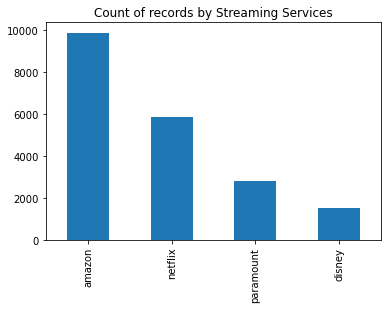

In [192]:
# 각 플랫폼 영화 숫자 파악 
#pokemon["Type 2"].value_counts().plot(kind="bar")
#"Count of records by Streaming Services"

df["Platform"].value_counts().plot(kind="bar")
plt.title("Count of records by Streaming Services")
plt.show()

In [193]:
# 결측치 확인 
df.isnull().sum()

title                       1
type                        0
release_year                0
age_certification       10954
runtime                     0
genres                      0
production_countries        0
seasons                 15577
imdb_score               2142
imdb_votes               2171
tmdb_popularity           706
tmdb_score               2990
Platform                    0
dtype: int64

In [194]:
# title 결측치 삭제 하기 
df = df[~df["title"].isnull()]


# age_certification 결측치 없에기 

print(df["age_certification"].unique())
df["age_certification"].fillna("Not Rated",inplace=True)

# seasons의 nan은 0으로 하기 
df["seasons"].fillna(0,inplace=True)


#나머지 결측치는 평균값으로 하기 
df["imdb_score"].fillna(df["imdb_score"].mean(),inplace=True)
df["imdb_votes"].fillna(df["imdb_votes"].mean(),inplace=True)
df["tmdb_popularity"].fillna(df["tmdb_popularity"].mean(),inplace=True)
df["tmdb_score"].fillna(df["tmdb_score"].mean(),inplace=True)


['TV-PG' nan 'PG' 'G' 'PG-13' 'R' 'TV-G' 'TV-Y' 'TV-14' 'NC-17' 'TV-Y7'
 'TV-MA']


In [195]:
# 결측치 확인 
df.isnull().sum()

title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
Platform                0
dtype: int64


지금 결측치가 age_certification과 seasons가 많이 있다 

1. movie && not rate 결과 있다 

2. show&& not rate 결과도 있다 

3. seasons가 0인건(결측치) 모두 movie이다 - 보통 영화 한편을 1 seasons라고 하지 않으니까 0으로 대체  






In [196]:
# seasons가 0인것 확인해보기 
o=df[df["seasons"]==0]
o[o["type"]=="SHOW"]  # season이 0인건 모두 movies이다 


,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Platform


<AxesSubplot:>

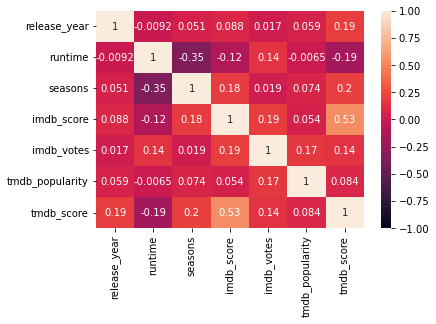

In [197]:
# 상관관계 heatmap 

sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

In [198]:
# 각 컬럼별 상관 관계 시각화 해보기 


<AxesSubplot:xlabel='type', ylabel='count'>

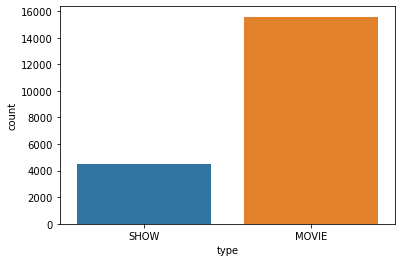

In [199]:
# movie show 시각화 
sns.countplot(data=df,x="type")


<AxesSubplot:xlabel='age_certification', ylabel='count'>

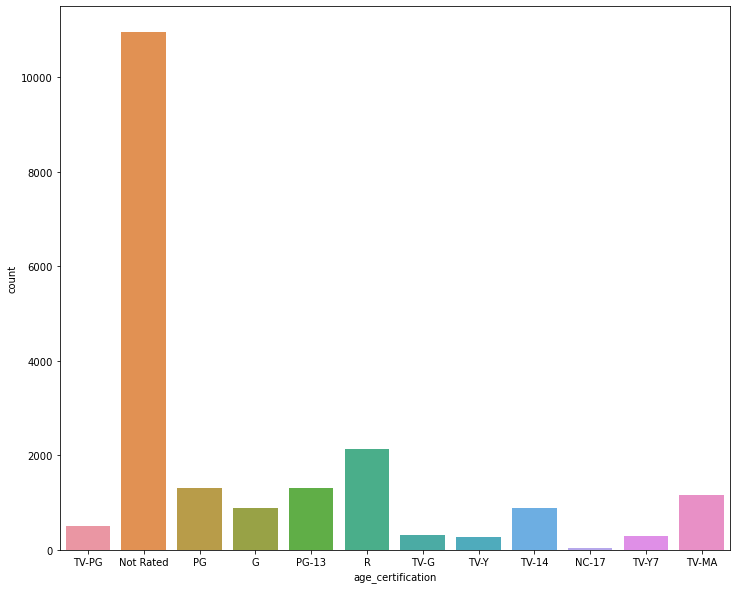

In [200]:
# age_criteran 시각화 
plt.figure(figsize=(12,10))
sns.countplot(data=df,x="age_certification")


In [201]:
# 장르 나누고 시각화 하기 [영화 ,show]
import re


#f = lambda x : re.findall("\w+",x)
#type(f(df.iloc[0]["genres"])) -> list 

df["genres"] =df["genres"].apply(lambda x : re.findall("\w+",x))
genres_list = list(df["genres"].values)

new_genres_list =[]
for sublist in genres_list:
    for item in sublist:
        new_genres_list.append(item)



new_genres_list = set(new_genres_list)

for i,genre in enumerate(new_genres_list):
    df[genre]=df["genres"].apply(lambda x: 1 if genre in x else 0).astype(int) # 해당하는 장르 컬럼 새로 만들어주기

    
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,...,sport,scifi,european,reality,drama,documentation,family,crime,comedy,war
0,The Three Stooges,SHOW,1934,TV-PG,19,"[comedy, family, animation, action, fantasy, h...",['US'],26.0,8.6,1092.0,...,0,0,0,0,0,0,1,0,1,0
1,The General,MOVIE,1926,Not Rated,78,"[action, drama, war, western, comedy, european]",['US'],0.0,8.2,89766.0,...,0,0,1,0,1,0,0,0,1,1
2,The Best Years of Our Lives,MOVIE,1946,Not Rated,171,"[romance, war, drama]",['US'],0.0,8.1,63026.0,...,0,0,0,0,1,0,0,0,0,1
3,His Girl Friday,MOVIE,1940,Not Rated,92,"[comedy, drama, romance]",['US'],0.0,7.8,57835.0,...,0,0,0,0,1,0,0,0,1,0
4,In a Lonely Place,MOVIE,1950,Not Rated,94,"[thriller, drama, romance]",['US'],0.0,7.9,30924.0,...,0,0,0,0,1,0,0,0,0,0


<Figure size 864x720 with 0 Axes>

In [208]:
# 시각화 위한 전처리 

# 영화중에서 각 장르별 개수 센다 
genre_movie_dict = {}

for genre in new_genres_list:
    genre_movie_dict[genre] = df.query("type == 'MOVIE'")[genre].sum()

genre_movie_dict = dict(sorted(genre_movie_dict.items(), key=lambda x: x[0]))

# show중에서 장르별 개수 센다 
genre_series_dict = {}

for genre in new_genres_list:
    genre_series_dict[genre] = df.query("type == 'SHOW'")[genre].sum()

genre_series_dict = dict(sorted(genre_series_dict.items(), key=lambda x: x[0]))




<AxesSubplot:>

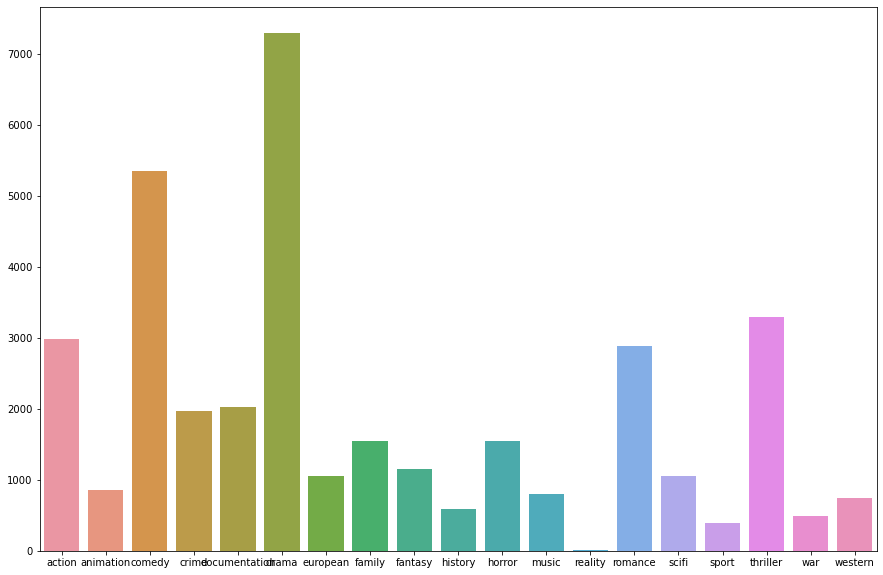

In [221]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
movie_genres=pd.DataFrame.from_dict(genre_movie_dict,orient="index").T
sns.barplot(data=movie_genres)

<AxesSubplot:>

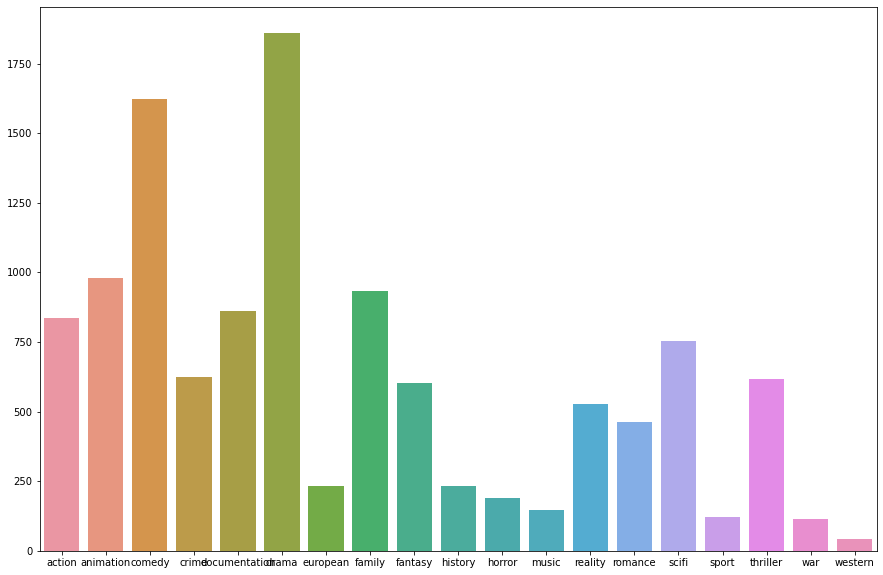

In [222]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
show_genres=pd.DataFrame.from_dict(genre_series_dict,orient="index").T
sns.barplot(data=show_genres)

In [226]:
# 장르별 ibdm score 시각화 하기 -> 평균값으로 했다 

genre_movie_idbdm={}
genre_show_idbdm={}

for i,genre in enumerate(new_genres_list):
    genre_movie_idbdm[genre] = df[df["type"]=="MOVIE"].groupby(genre)["imdb_score"].mean().sort_index().__getitem__(1)

    
    
for i,genre in enumerate(new_genres_list):
    genre_show_idbdm[genre] = df[df["type"]=="SHOW"].groupby(genre)["imdb_score"].mean().sort_index().__getitem__(1)
    



<AxesSubplot:>

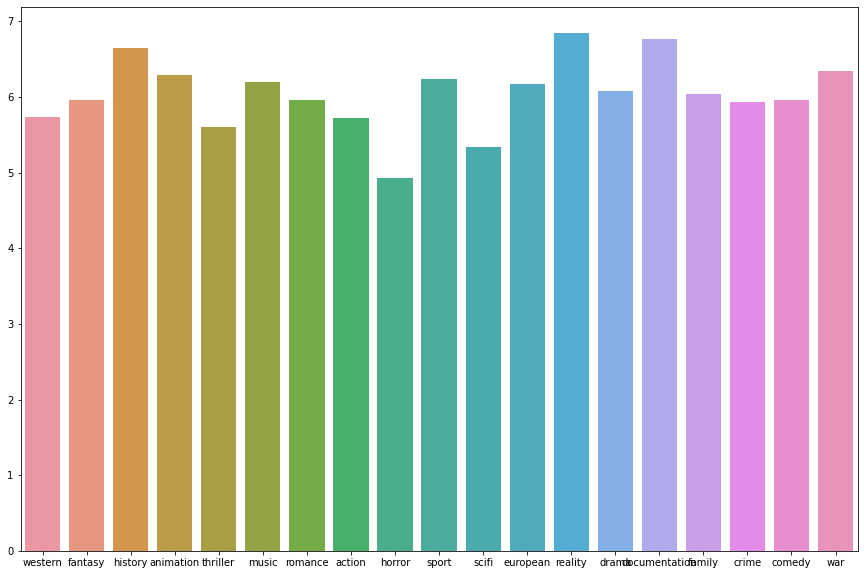

In [229]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
movie_genr=pd.DataFrame.from_dict(genre_movie_idbdm,orient="index").T
sns.barplot(data=movie_genr)

<AxesSubplot:>

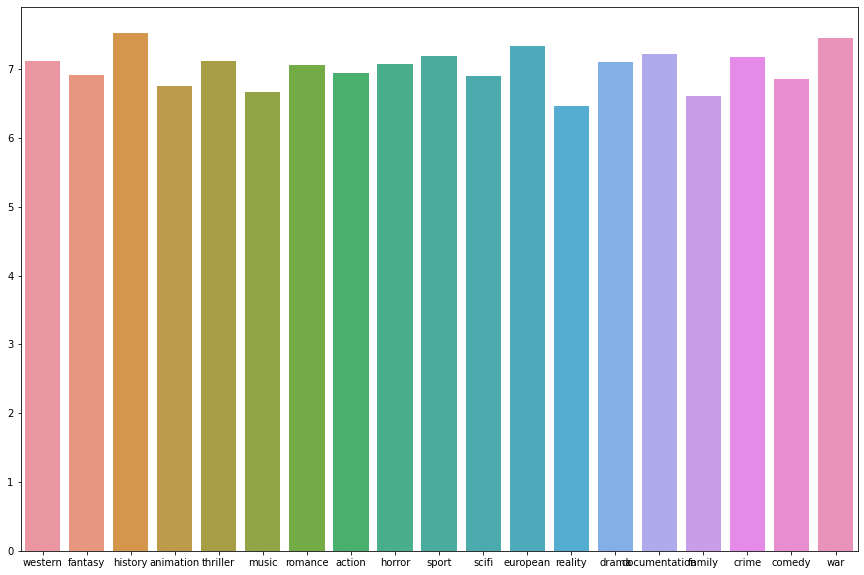

In [230]:
# dictionry -> DataFrame 
plt.figure(figsize=(15,10))
show_genr=pd.DataFrame.from_dict(genre_show_idbdm,orient="index").T
sns.barplot(data=show_genr)

In [243]:
df['production_countries'].value_counts().index[:20]

Index(['['US']', '['IN']', '[]', '['GB']', '['CA']', '['JP']', '['KR']',
       '['FR']', '['AU']', '['ES']', '['CA', 'US']', '['CN']', '['XX']',
       '['GB', 'US']', '['MX']', '['IT']', '['DE']', '['BR']', '['US', 'CA']',
       '['US', 'GB']'],
      dtype='object')

<AxesSubplot:xlabel='production_countries', ylabel='count'>

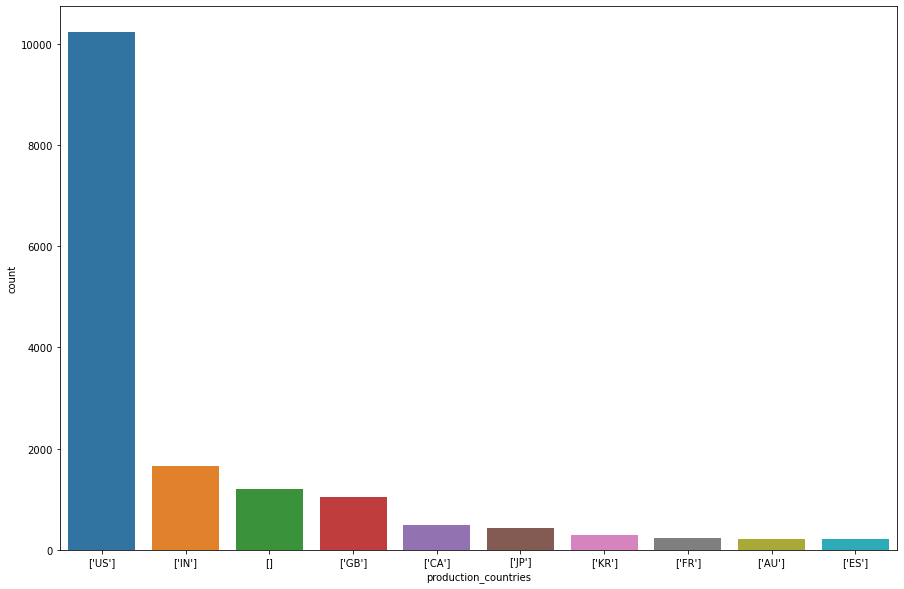

In [238]:
# 나라별 시각화 

plt.figure(figsize=(15,10))

sns.countplot(data=df,x="production_countries",order = df['production_countries'].value_counts().index[:10]) 
# 각 독립적인 나라별로만 시각화 한것이다
